# Numerical Differentiation - Coding Activities
## CH EN 2450 - Numerical Methods
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**
<hr/>

In [13]:
import numpy as np
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.rcParams['lines.markeredgecolor'] = 'w'
mpl.rcParams['lines.markeredgewidth'] = .5
mpl.rcParams['figure.figsize'] = [9.5, 6]

## Using Taylor series to estimate derivatives

$$
f(x_{i+1}) = \sum \frac{1}{n!}f^{(n)}(x_i)(x_{i+1}-x_i) \\
$$

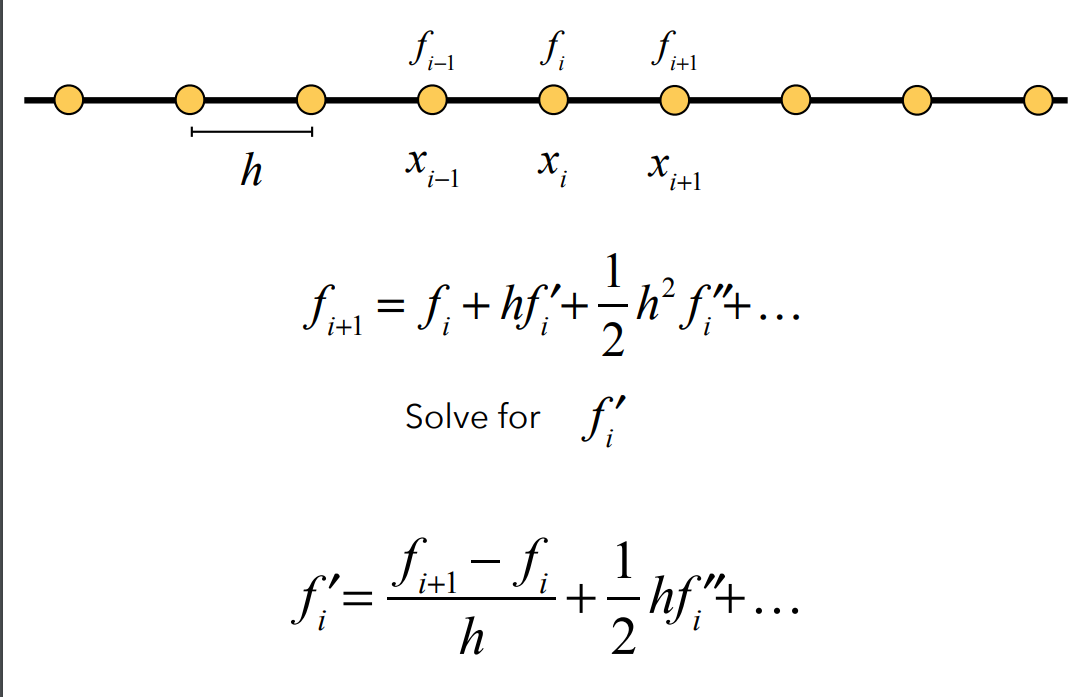

### This is exactly the same as interpolating the 2 points and getting the slope of the interpolant.

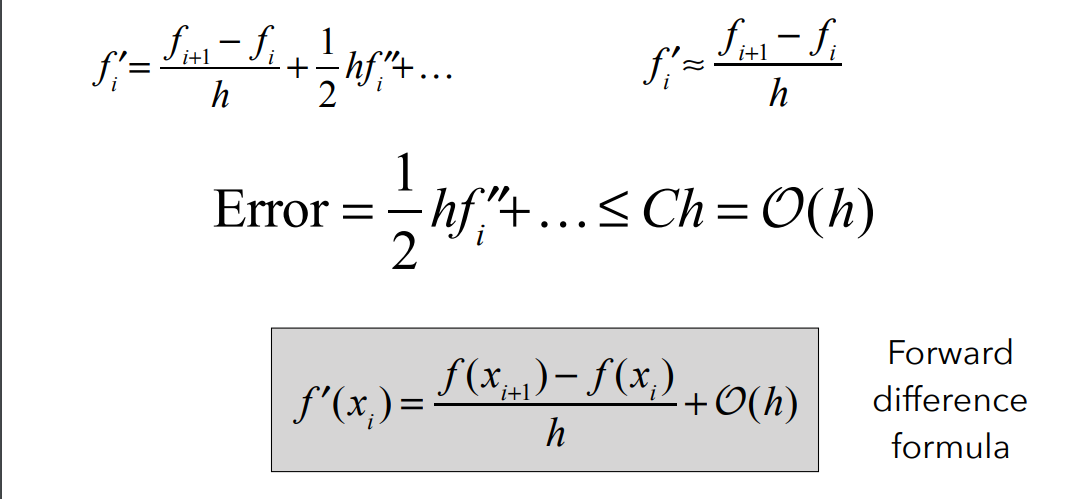

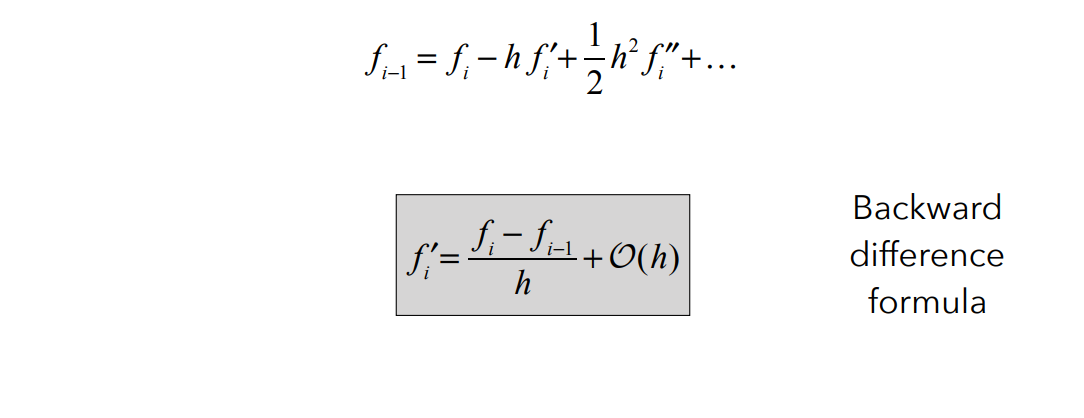

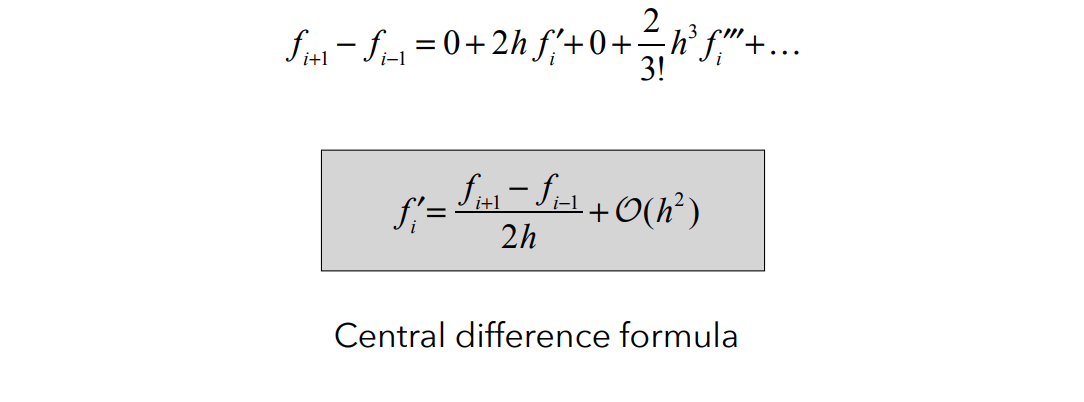

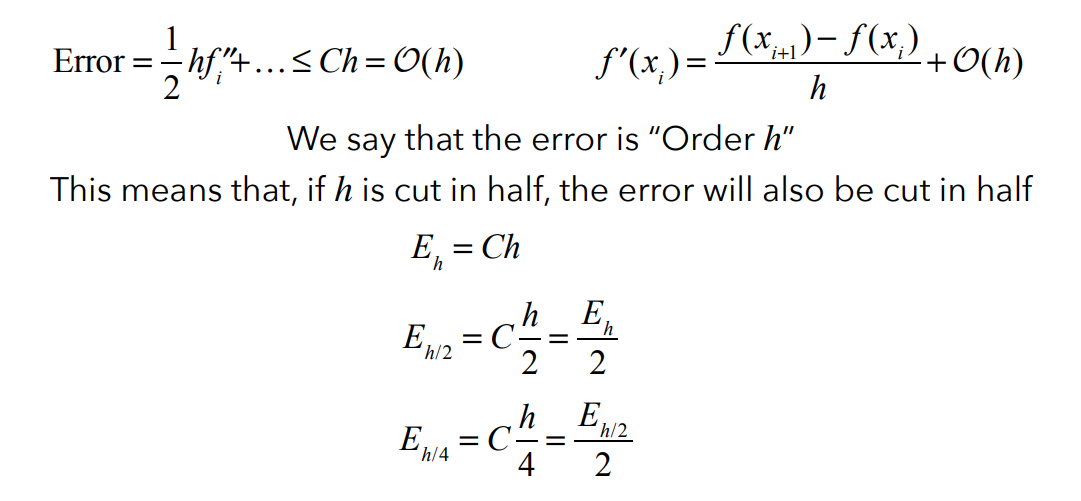

# Coding Activity 1
For f(x) = exp(x), compute the absolute true error for f’(2) using the forward difference formula for h ranging from 1e-5 to 1

In [14]:
# compute the true derivative of exp(x)
trueVal = np.exp(2)
print(trueVal)

7.38905609893065


In [15]:
# define a forward difference routine
def dfdx(f, xi, h):
    return (f(xi + h) - f(xi))/h

In [16]:
h = np.linspace(1e-5,1)

In [17]:
x = 2
numericDerivs = dfdx(np.exp, x, h)

In [18]:
errors = np.abs(numericDerivs - trueVal) 
print(errors)

[3.69454325e-05 7.59507620e-02 1.52906248e-01 2.30919494e-01
 3.10006858e-01 3.90184964e-01 4.71470714e-01 5.53881287e-01
 6.37434148e-01 7.22147047e-01 8.08038033e-01 8.95125450e-01
 9.83427946e-01 1.07296448e+00 1.16375433e+00 1.25581708e+00
 1.34917265e+00 1.44384130e+00 1.53984360e+00 1.63720050e+00
 1.73593326e+00 1.83606352e+00 1.93761327e+00 2.04060487e+00
 2.14506106e+00 2.25100495e+00 2.35846004e+00 2.46745022e+00
 2.57799978e+00 2.69013344e+00 2.80387629e+00 2.91925388e+00
 3.03629218e+00 3.15501757e+00 3.27545690e+00 3.39763747e+00
 3.52158704e+00 3.64733382e+00 3.77490651e+00 3.90433429e+00
 4.03564683e+00 4.16887430e+00 4.30404739e+00 4.44119730e+00
 4.58035575e+00 4.72155501e+00 4.86482789e+00 5.01020775e+00
 5.15772853e+00 5.30742473e+00]


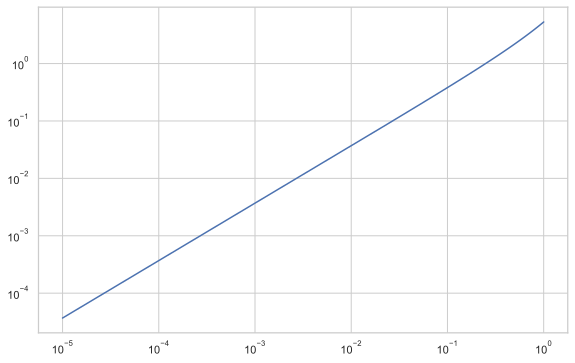

In [19]:
plt.loglog(h, errors)
plt.show()

# Activity 2
Develop a Python code that to find the first derivative of discrete data and apply the code to analyze the CoVid19 cases. Your code should use central differencing for interior points, forward and backward for the first and last points.

Import the covid19 data

In [20]:
# import data for Mainland China
yich = np.loadtxt('covid19_china_totaldailycases.txt')
n = len(yich)
xi = np.arange(0,n)
# import data for entire world (including China)
yiwrld = np.loadtxt('covid19_world_totaldailycases.txt')

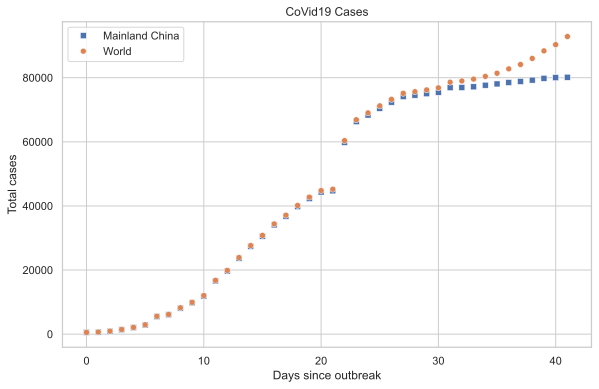

In [21]:
plt.plot(xi,yich,'s',label='Mainland China')
plt.plot(xi,yiwrld,'o',label='World')
plt.legend()
plt.xlabel('Days since outbreak')
plt.ylabel('Total cases')
plt.title('CoVid19 Cases')
plt.savefig('Covid19data.pdf')

In [22]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(a[-1])

9


In [26]:
def dfdx(xi,fi):
    dx = xi[1] - xi[0] # we assume that dx is constant
    result = np.zeros_like(fi) # create an empty array to store the results
    result[0] = (fi[1] - fi[0])/dx # use forward difference for the first point
    result[1:-1] = (fi[2:] - fi[0:-2])/(2*dx) # use central difference for all points in the middle
    result[-1] = (fi[-1] - fi[-2])/dx # use backward difference for last point
    return result

In [27]:
# apply differentiation routines to the input data
r1 = dfdx(xi,yich)
r2 = dfdx(xi,yiwrld)

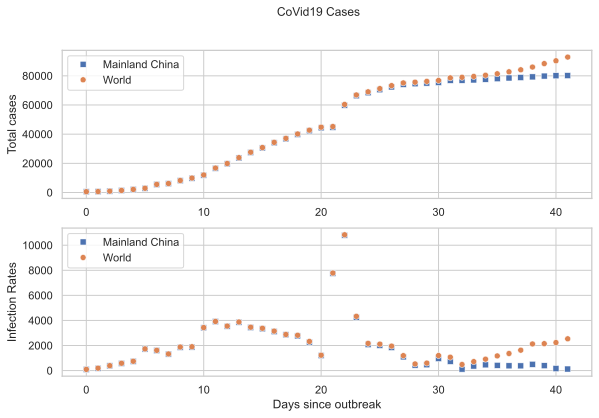

In [28]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(xi,yich,'s',label='Mainland China')
ax[0].plot(xi,yiwrld,'o',label='World')
ax[0].legend(loc='upper left')
ax[0].set_ylabel('Total cases')
plt.suptitle('CoVid19 Cases')
# plt.savefig('Covid19data.pdf')

ax[1].plot(xi,r1,'s', label='Mainland China')
ax[1].plot(xi,r2,'o', label='World')
ax[1].set_ylabel('Infection Rates')
ax[1].set_xlabel('Days since outbreak')
ax[1].legend(loc='upper left')
plt.show()